In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
%ls datasets-20220215T134220Z-001/datasets/

 antropometria00.csv
'antropometria-dataset-1 (1).csv'
 Book3.csv
 Canada.xlsx
 Cartwheeldata.csv
 census.csv
 coches.csv
 cwurData.csv
 data.csv
 headbrain.csv
 Height_of_Male_and_Female_by_Country_2022.csv
 mic2.xlsx
 mic.xlsx
 movies.csv
 nhanes_2015_2016.csv
 pokemon.csv
 reg_data.csv
 sample_pivot.csv
 tips.csv
 weight-height.csv


In [19]:
df = pd.read_csv("datasets-20220215T134220Z-001/datasets/Height_of_Male_and_Female_by_Country_2022.csv")
df.head()

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
0,1,Netherlands,183.78,170.36,6.03,5.59
1,2,Montenegro,183.30,169.96,6.01,5.58
2,3,Estonia,182.79,168.66,6.00,5.53
3,4,Bosnia and Herzegovina,182.47,167.47,5.99,5.49
4,5,Iceland,182.10,168.91,5.97,5.54


In [20]:
df.describe()

,Rank,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,100.000000,173.089045,160.942915,5.678794,5.280402
std,57.590508,4.949832,4.076377,0.162510,0.133870
min,1.000000,160.130000,150.910000,5.250000,4.950000
25%,50.500000,169.490000,158.240000,5.560000,5.190000
50%,100.000000,173.530000,160.620000,5.690000,5.270000
75%,149.500000,176.510000,163.870000,5.790000,5.375000
max,199.000000,183.780000,170.360000,6.030000,5.590000


In [21]:
#I want to visualize the following information:
#In terms of Male's height, top 10 tallest and shortest countries? (what country & what continent)?
#In terms of Female's height, top 10 tallest and shortest countries? (what country & what continent)?
#In terms of both sex, is there any correlation or similarity in their heights? (e.g: Country A men are the tallest in the world but is it the same to women?)
#In terms of both sex, visualize the mean height and see the top 10 tallest and shortest countries

In [22]:
new_df = df.drop(['Male Height in Ft', 'Female Height in Ft'], axis=1)
new_df.tail(10)

,Rank,Country Name,Male Height in Cm,Female Height in Cm
189,190,Madagascar,165.16,153.06
190,191,Bangladesh,165.08,152.38
191,192,Yemen,164.42,154.76
192,193,Nepal,164.36,152.39
193,194,Guatemala,164.36,150.91
194,195,Mozambique,164.30,155.42
195,196,Papua New Guinea,163.10,156.89
196,197,Solomon Islands,163.07,156.79
197,198,Laos,162.78,153.10
198,199,Timor-Leste,160.13,152.71


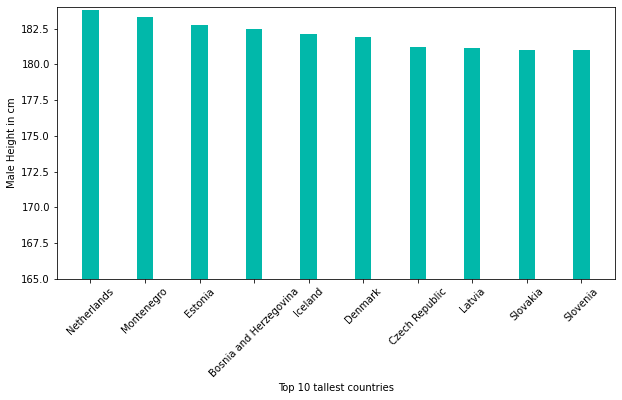

In [23]:
color_red = '#fd625e'
color_blue = '#01b8aa'

top10_tallest_country_male = new_df.sort_values('Male Height in Cm', ascending=False)

fig = plt.figure(figsize = (10, 5))
 
plt.bar(data=top10_tallest_country_male.head(10), x='Country Name', height='Male Height in Cm', width=0.3, color=color_blue)
plt.xticks(rotation=45)
plt.ylim(ymin=165,ymax=184)
plt.ylabel('Male Height in cm')
plt.xlabel('Top 10 tallest countries')
plt.show()

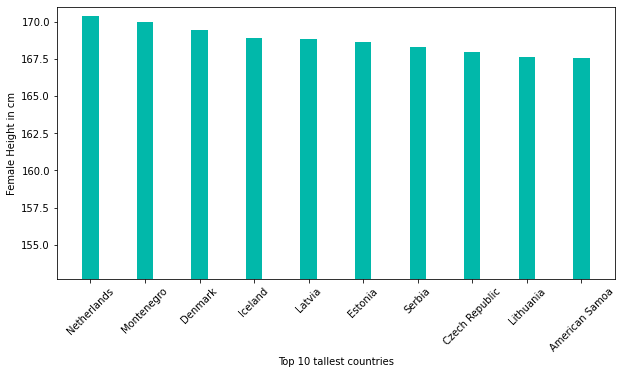

In [24]:
top10_tallest_country_female = new_df.sort_values('Female Height in Cm', ascending=False)
fig = plt.figure(figsize = (10, 5))
 
plt.bar(data=top10_tallest_country_female.head(10), x='Country Name', height='Female Height in Cm', width=0.3, color=color_blue)
plt.xticks(rotation=45)
plt.ylim(ymin=152.71,ymax=171)
plt.ylabel('Female Height in cm')
plt.xlabel('Top 10 tallest countries')
plt.show()

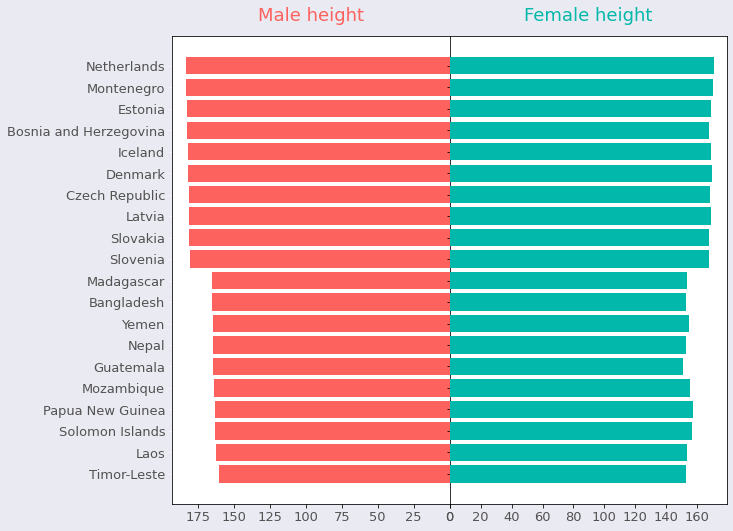

In [25]:
combined_tallest = new_df.head(10)
combined_shortest = new_df.tail(10)

combined_data = pd.concat([combined_tallest, combined_shortest])
combined_data = combined_data.set_index('Country Name')

fig, axes = plt.subplots(figsize=(10,5), facecolor='#eaeaf2', ncols=2, sharey=True)
fig.tight_layout()
font_color = '#525252'



axes[0].barh(combined_data.index, combined_data['Male Height in Cm'], align='center', color=color_red, zorder=10)
axes[0].set_title('Male height', fontsize=18, pad=15, color=color_red, )
axes[1].barh(combined_data.index, combined_data['Female Height in Cm'], align='center', color=color_blue, zorder=10)
axes[1].set_title('Female height', fontsize=18, pad=15, color=color_blue, )

axes[0].invert_xaxis()
plt.gca().invert_yaxis()

axes[0].set(yticks=combined_data.index, yticklabels=combined_data.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, )
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color,)

plt.subplots_adjust(wspace=0, top=1.5, bottom=0.2, left=1.18, right=1.95)

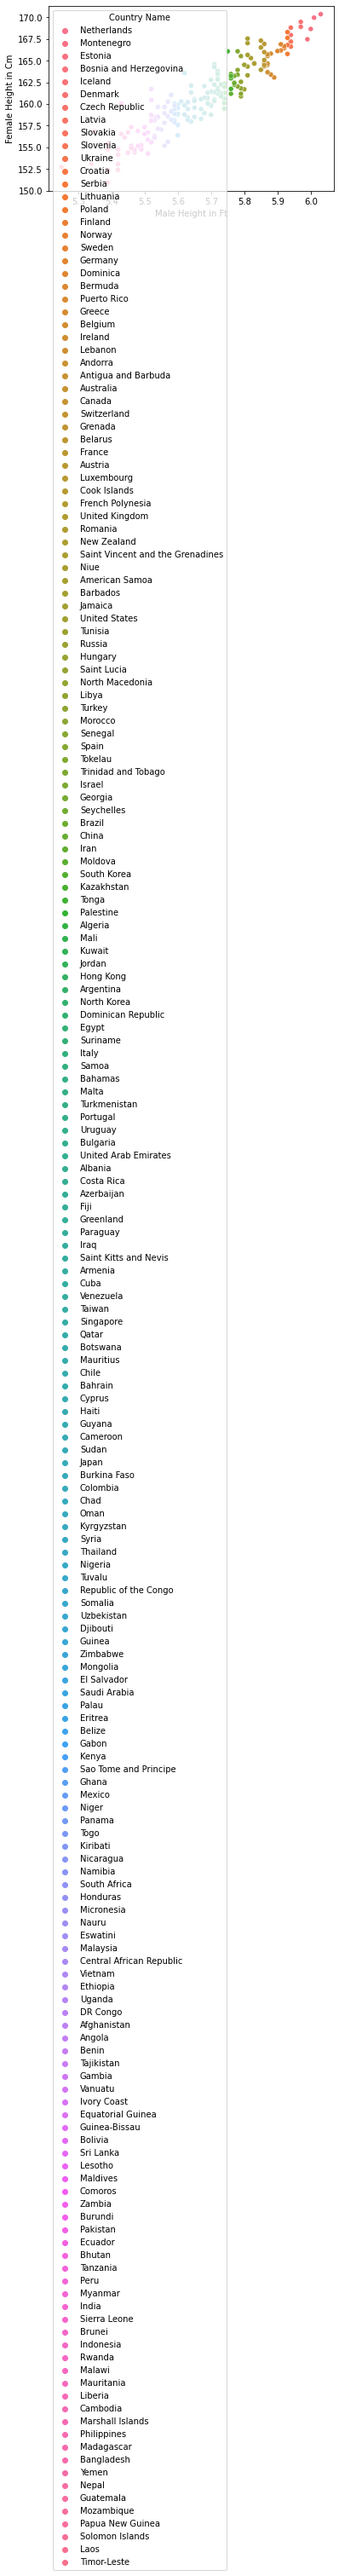

In [26]:
sns.scatterplot( x=df["Male Height in Ft"], y=df["Female Height in Cm"], hue=df["Country Name"])

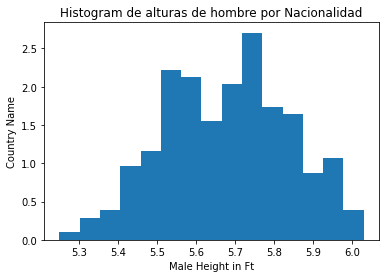

In [27]:
n, bins, patches=plt.hist(df['Male Height in Ft'],bins=15,density=True)
plt.xlabel("Male Height in Ft")
plt.ylabel("Country Name")
plt.title("Histogram de alturas de hombre por Nacionalidad")
plt.show()